In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./cdc.csv')

In [3]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [4]:
df.shape

(53392, 33)

In [5]:
df.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               53392
Data_Value_Type                   0
Data_Value                     5046
Data_Value_Alt                 5046
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Low_Confidence_Limit           5046
High_Confidence_Limit          5046
Sample_Size                    5046
Total                         51485
Age(years)                    41954
Education                     45764
Gender                        49578
Income                        40043
Race/Ethnicity                38136
GeoLocation                    1008
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

In [6]:
df.Topic.value_counts()

Physical Activity - Behavior        26628
Obesity / Weight Status             17920
Fruits and Vegetables - Behavior     8844
Name: Topic, dtype: int64

In [7]:
df.Class.value_counts()

Physical Activity          26628
Obesity / Weight Status    17920
Fruits and Vegetables       8844
Name: Class, dtype: int64

In [8]:
df.Question.value_counts()

Percent of adults aged 18 years and older who have obesity                                                                                                                                                                                               8960
Percent of adults aged 18 years and older who have an overweight classification                                                                                                                                                                          8960
Percent of adults who engage in no leisure-time physical activity                                                                                                                                                                                        8932
Percent of adults who report consuming vegetables less than one time daily                                                                                                                                                                    

In [9]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [10]:
xvars = ['YearStart', 'YearEnd', 'LocationAbbr', 'Topic', 'Question', 'Data_Value', 'Sample_Size', 'Age(years)', 'Education', 'Gender',
         'Income', 'Race/Ethnicity', 'GeoLocation', 'StratificationCategory1', 'Stratification1']
df_new = df[xvars]

In [11]:
df_new.head()

,YearStart,YearEnd,LocationAbbr,Topic,Question,Data_Value,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,StratificationCategory1,Stratification1
0,2011,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,7304.0,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",Total,Total
1,2011,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,2581.0,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",Gender,Male
2,2011,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,4723.0,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",Gender,Female
3,2011,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,1153.0,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",Education,Less than high school
4,2011,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,2402.0,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",Education,High school graduate


In [12]:
df['Data_Value'].mean()

31.15668100773583

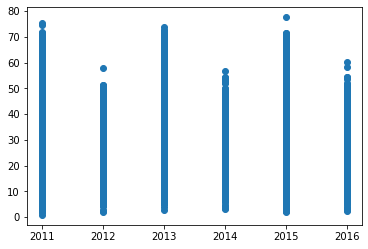

In [13]:
plt.scatter(df['YearEnd'], df['Data_Value']);

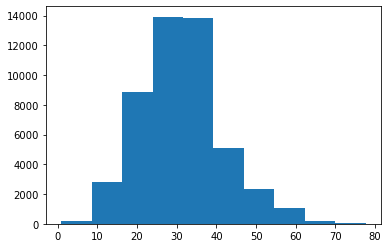

In [14]:
plt.hist(df['Data_Value']);

In [15]:
import re
df['GeoLocation'] = df['GeoLocation'].str.replace(r'[()]', '')

C:\Users\rmped\AppData\Local\Temp\ipykernel_8616\12795041.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['GeoLocation'] = df['GeoLocation'].str.replace(r'[()]', '')


In [30]:
df['GeoLocation'].fillna('0, 0', inplace=True)

In [37]:

lat = [float(df['GeoLocation'][i].split(',')[0]) for i in range(len(df['GeoLocation']))]
long = [float(df['GeoLocation'][i].split(',')[1]) for i in range(len(df['GeoLocation']))]
    
df['lat'] = lat
df['long'] = long

In [29]:
df['GeoLocation'][0]

'32.84057112200048, -86.63186076199969'

In [ ]:
df['Question']

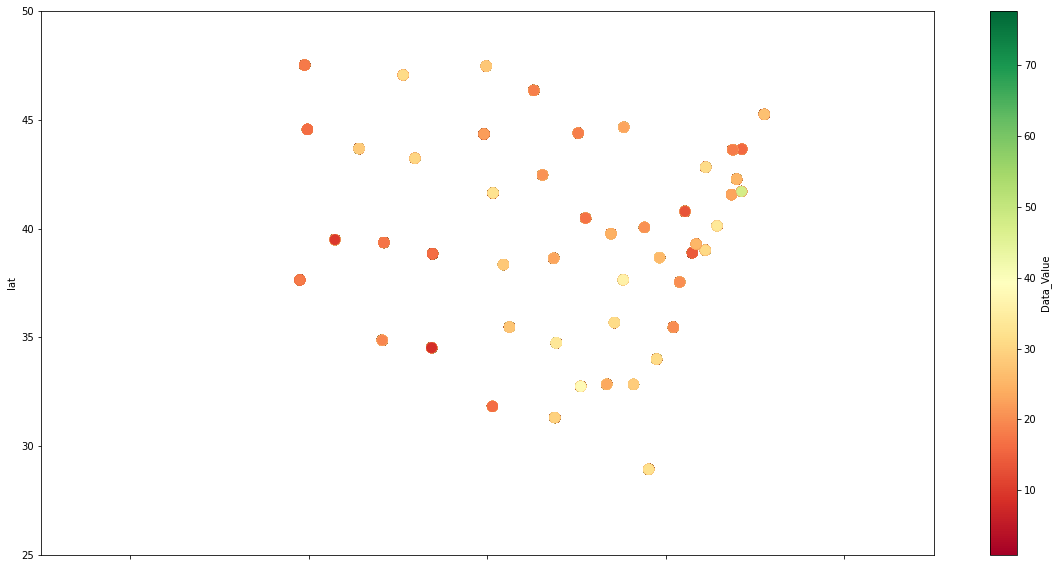

In [51]:
# Change long and lat to geolocation from data
df.plot(kind="scatter", x="long", y="lat", c="Data_Value",
         cmap="RdYlGn", figsize=(20, 10), s = 100)
plt.ylim([25, 50])
plt.xlim([-150, -50]);

In [35]:
df.dtypes

YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Data_Value_Unit               float64
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Sample_Size                   float64
Total                          object
Age(years)                     object
Education                      object
Gender                         object
Income                         object
Race/Ethnicity                 object
GeoLocation                    object
ClassID                        object
TopicID                        object
QuestionID  

In [39]:
df['long'].describe()

count    53392.000000
mean       -89.466253
std         30.741408
min       -157.857749
25%       -100.373531
50%        -88.997710
75%        -77.860700
max        144.793731
Name: long, dtype: float64